# 10章 アンケート分析を行うための言語処理１０本ノック

ここでは、まちづくりのアンケートを使って分析していきます。  
主に言語処理を取り扱っていきます。
言語処理特有の処理や、データの持たせ方を学びましょう。

### ノック91：データを読み込んで把握しよう

In [1]:
import pandas as pd
survey = pd.read_csv("survey.csv")
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [2]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [3]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### ノック92：不要な文字を除外してみよう

In [4]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [5]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [6]:
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


### ノック93：文字数をカウントしてヒストグラムを表示してみよう

In [7]:
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <BarContainer object of 10 artists>)

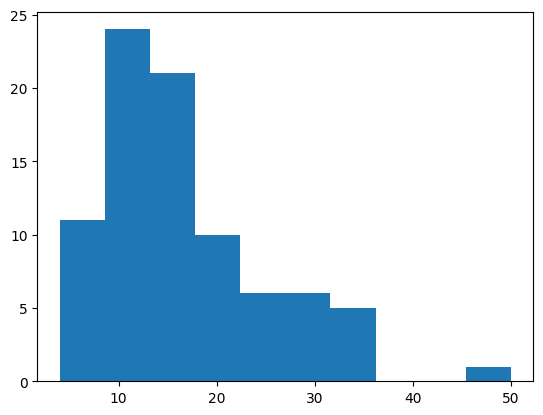

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

### ノック94：形態素解析で文章を分割してみよう

In [9]:
#!pip install mecab-python3 unidic-lite

     ---------------------------------------- 0.0/47.4 MB ? eta -:--:--
     ---------------------------------------- 0.3/47.4 MB 9.6 MB/s eta 0:00:05
      --------------------------------------- 0.8/47.4 MB 9.6 MB/s eta 0:00:05
     - -------------------------------------- 1.3/47.4 MB 10.2 MB/s eta 0:00:05
     - -------------------------------------- 1.8/47.4 MB 10.5 MB/s eta 0:00:05
     - -------------------------------------- 2.3/47.4 MB 10.3 MB/s eta 0:00:05
     -- ------------------------------------- 2.6/47.4 MB 9.9 MB/s eta 0:00:05
     -- ------------------------------------- 3.1/47.4 MB 9.8 MB/s eta 0:00:05
     --- ------------------------------------ 3.6/47.4 MB 9.9 MB/s eta 0:00:05
     --- ------------------------------------ 3.9/47.4 MB 9.7 MB/s eta 0:00:05
     --- ------------------------------------ 4.3/47.4 MB 9.6 MB/s eta 0:00:05
     ---- ----------------------------------- 4.8/47.4 MB 9.6 MB/s eta 0:00:05
     ---- ----------------------------------- 5.4/47.4 M


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [11]:
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i.split()[0]
    words_arr.append(word_tmp)
words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

### ノック95：形態素解析で文章から「動詞・名詞」を抽出してみよう

In [12]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
words_arr = []
parts = ["名詞", "動詞"]
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i.split()[0]
    part = i.split()[4].split("-")[0]
    if not (part in parts):continue
    words_arr.append(word_tmp)
words_arr

['すもも', 'もも', 'もも', 'うち']

### ノック96：形態素解析で抽出した頻出する名詞を確認してみよう

In [13]:
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        if len(i.split())>=4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):continue
            words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート', '

In [14]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head(20)

,count
words,
駅前,7
場所,6
商店,5
公園,5
役所,5
対応,4
駐車,4
信号,3
道,3


### ノック97：関係のない単語を除去しよう

In [15]:
stop_words = ["時"]
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        if len(i.split())>=4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):continue
            if word_tmp in stop_words:continue
            words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート', '確認', '街づくり

In [16]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head(20)

,count
words,
駅前,7
場所,6
役所,5
商店,5
公園,5
対応,4
駐車,4
子育て,3
道,3


### ノック98：顧客満足度と頻出単語の関係をみてみよう

In [17]:
stop_words = ["時"]
parts = ["名詞"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        if len(i.split())>=4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):continue
            if word_tmp in stop_words:continue
            words_arr.append(word_tmp)
            satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()

,words,satisfaction,count
0,駅前,1,1
1,若者,1,1
2,スポーツ,5,1
3,場所,5,1
4,子育て,5,1


In [18]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,
BBB,2.0,1
おじ,1.0,1
ごみ,2.0,1
とき,5.0,1
まち,2.0,1


In [19]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,
子育て,4.333333,3
安心,4.333333,3
スポーツ,3.666667,3
場所,3.000000,6
役所,3.000000,5


In [20]:
words_df.sort_values("satisfaction").head()

,satisfaction,count
words,,
駐車,1.000000,4
信号,1.333333,3
駅前,1.428571,7
街路,1.666667,3
対応,2.000000,4


### ノック99：アンケート毎の特徴を表現してみよう

In [21]:
parts = ["名詞"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        if len(i.split())>=4:
            part = i.split()[4].split("-")[0]
            if not (part in parts):continue
            words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)
all_words_df.head()

,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,...,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,...,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ノック100：類似アンケートを探してみよう

In [23]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

子育て支援が嬉しい
駅前      0.0
若者      0.0
スポーツ    0.0
場所      0.0
子育て     1.0
       ... 
サポート    0.0
校庭      0.0
芝生      0.0
投稿      0.0
道具      0.0
Name: 2, Length: 161, dtype: float64


In [24]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim",ascending=False).head()

C:\Users\treme\AppData\Local\Temp\ipykernel_27600\2297773024.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_words_df["cos_sim"] = cos_sim


,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,...,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具,cos_sim
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553


In [25]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[24])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[33])

子育て支援が嬉しい
子育てがしやすい
子育てしやすい
働くママの支援をもっと増やして欲しい
